<a href="https://colab.research.google.com/github/HB-enpitsu/garakuta/blob/main/%E4%BB%8A%E6%B2%BB%E5%B8%82%E5%86%85%E5%B0%8F%E5%AD%A6%E6%A0%A1%E7%94%9F%E5%BE%92%E6%95%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install rtree
!pip install pygeos

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.9 MB/s eta 0:00:00


In [2]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120258 sha256=d205f0f7992b53a6b74332339a81235d16cf73f25bd0b4e64d3a5901fdbf0031
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


国土数値情報ダウンロードサイト

令和3（2021）年度　小学校区データ

https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-A27-v3_0.html

In [3]:
!wget https://nlftp.mlit.go.jp/ksj/gml/data/A27/A27-21/A27-21_38_GML.zip -O ehime.zip

--2023-08-16 04:18:43--  https://nlftp.mlit.go.jp/ksj/gml/data/A27/A27-21/A27-21_38_GML.zip
Resolving nlftp.mlit.go.jp (nlftp.mlit.go.jp)... 192.29.105.247, 147.154.112.73, 147.154.116.181
Connecting to nlftp.mlit.go.jp (nlftp.mlit.go.jp)|192.29.105.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5557566 (5.3M) [application/zip]
Saving to: ‘ehime.zip’

ehime.zip           100%[===================>]   5.30M  9.41MB/s    in 0.6s    

2023-08-16 04:18:46 (9.41 MB/s) - ‘ehime.zip’ saved [5557566/5557566]



In [4]:
import pandas as pd
import geopandas as gpd

/usr/local/lib/python3.10/dist-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-4-b54ed064774a>:2: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling Py

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib

In [6]:
mpl.rcParams["figure.dpi"] = 200

# 小学校区データ

In [7]:
ehime = gpd.read_file("ehime.zip")

In [8]:
# 今治市の小学校区データ
imabari = ehime[ehime["A27_001"] == "38202"].copy().reset_index(drop=True).rename(columns={"A27_004": "学校名", "A27_005": "住所"})
imabari

,A27_001,A27_002,A27_003,学校名,住所,geometry
0,38202,今治市立,B138220200263,岡村小学校,今治市関前岡村甲415,"MULTIPOLYGON (((132.87806 34.17759, 132.87807 ..."
1,38202,今治市立,B138220200156,鴨部小学校,今治市玉川町中村甲574-1,"POLYGON ((132.97970 34.01586, 132.97970 34.015..."
2,38202,今治市立,B138220200192,亀岡小学校,今治市菊間町種52,"POLYGON ((132.88490 34.05870, 132.88502 34.058..."
3,38202,今治市立,B138220200209,菊間小学校,今治市菊間町長坂2000-1,"POLYGON ((132.84932 34.04446, 132.84986 34.046..."
4,38202,今治市立,B138220200218,吉海小学校,今治市吉海町八幡157,"MULTIPOLYGON (((133.01876 34.13892, 133.01844 ..."
5,38202,今治市立,B138220200227,宮窪小学校,今治市宮窪町宮窪4765,"MULTIPOLYGON (((133.09607 34.17360, 133.09620 ..."
6,38202,今治市立,B138220200049,近見小学校,今治市近見町1-5-1,"POLYGON ((132.97622 34.11637, 132.97624 34.116..."
7,38202,今治市立,B138220200165,九和小学校,今治市玉川町摺木甲71-1,"POLYGON ((132.93997 34.03999, 132.94008 34.039..."
8,38202,今治市立,B138220200138,国分小学校,今治市古国分2-7-1,"POLYGON ((133.02815 34.03755, 133.02840 34.037..."
9,38202,今治市立,B138220200067,桜井小学校,今治市郷桜井1-8-26,"POLYGON ((133.04610 34.01666, 133.04602 34.016..."


In [9]:
# 地理座標系
imabari.set_crs(epsg=6668, inplace=True)

,A27_001,A27_002,A27_003,学校名,住所,geometry
0,38202,今治市立,B138220200263,岡村小学校,今治市関前岡村甲415,"MULTIPOLYGON (((132.87806 34.17759, 132.87807 ..."
1,38202,今治市立,B138220200156,鴨部小学校,今治市玉川町中村甲574-1,"POLYGON ((132.97970 34.01586, 132.97970 34.015..."
2,38202,今治市立,B138220200192,亀岡小学校,今治市菊間町種52,"POLYGON ((132.88490 34.05870, 132.88502 34.058..."
3,38202,今治市立,B138220200209,菊間小学校,今治市菊間町長坂2000-1,"POLYGON ((132.84932 34.04446, 132.84986 34.046..."
4,38202,今治市立,B138220200218,吉海小学校,今治市吉海町八幡157,"MULTIPOLYGON (((133.01876 34.13892, 133.01844 ..."
5,38202,今治市立,B138220200227,宮窪小学校,今治市宮窪町宮窪4765,"MULTIPOLYGON (((133.09607 34.17360, 133.09620 ..."
6,38202,今治市立,B138220200049,近見小学校,今治市近見町1-5-1,"POLYGON ((132.97622 34.11637, 132.97624 34.116..."
7,38202,今治市立,B138220200165,九和小学校,今治市玉川町摺木甲71-1,"POLYGON ((132.93997 34.03999, 132.94008 34.039..."
8,38202,今治市立,B138220200138,国分小学校,今治市古国分2-7-1,"POLYGON ((133.02815 34.03755, 133.02840 34.037..."
9,38202,今治市立,B138220200067,桜井小学校,今治市郷桜井1-8-26,"POLYGON ((133.04610 34.01666, 133.04602 34.016..."


<Axes: >

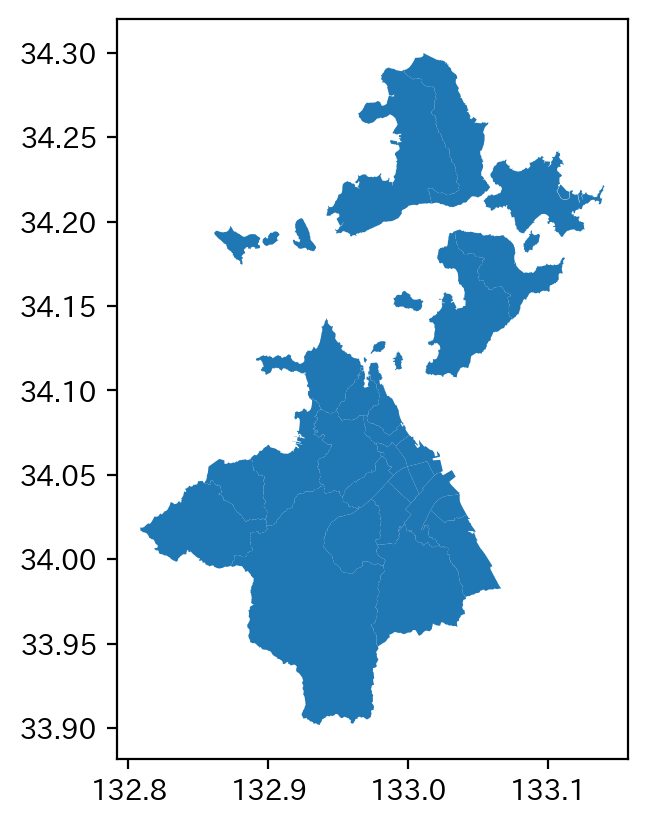

In [10]:
imabari.plot()

# 今治市立小学校児童数

In [11]:
df0 = pd.read_html("https://www.city.imabari.ehime.jp/gakukyou/shogakkou.html", index_col=0)[0].fillna(0).astype(str)

In [12]:
df1 = df0.applymap(lambda s: s.replace("人", "").replace(",", ""))

In [13]:
df1 = df1.astype(int).drop("合計")

In [14]:
df1

,新1年,2年,3年,4年,5年,6年,計
学校名,,,,,,,
吹揚小学校,59,61,51,67,61,66,365
別宮小学校,40,36,39,33,49,36,233
常盤小学校,69,76,76,82,86,92,481
近見小学校,48,46,36,47,51,58,286
立花小学校,71,70,59,67,85,89,441
鳥生小学校,88,83,65,76,66,72,450
桜井小学校,48,43,54,57,55,72,329
国分小学校,29,32,31,31,38,45,206
富田小学校,84,85,90,91,101,112,563


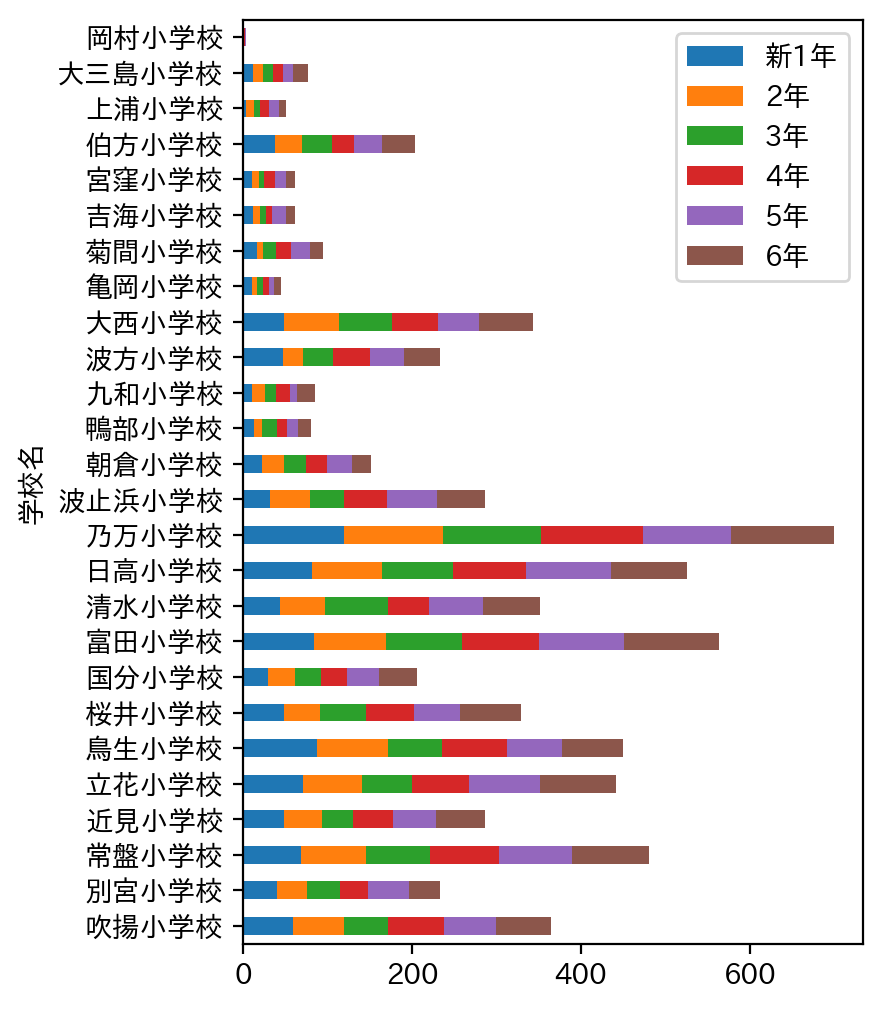

In [15]:
df1.iloc[:, :6].plot.barh(stacked=True, figsize=(4, 6))
plt.savefig("01.png", dpi=200, bbox_inches="tight")
plt.show()

# 今治市内の小学校の位置情報

In [16]:
df2 = pd.read_csv("https://www.city.imabari.ehime.jp/opendata/data/school.csv", encoding="cp932", dtype={"電話番号": str})

In [17]:
df3 = df2[df2["施設名"].str.endswith("小学校")].copy()

In [18]:
df3["施設名"] = df3["施設名"].str.replace("今治市立", "")

In [19]:
df3.set_index("施設名", inplace=True)

In [20]:
pt_df = gpd.GeoDataFrame(df3, geometry = gpd.points_from_xy(df3["経度"], df3["緯度"]), crs="EPSG:6668")

<Axes: >

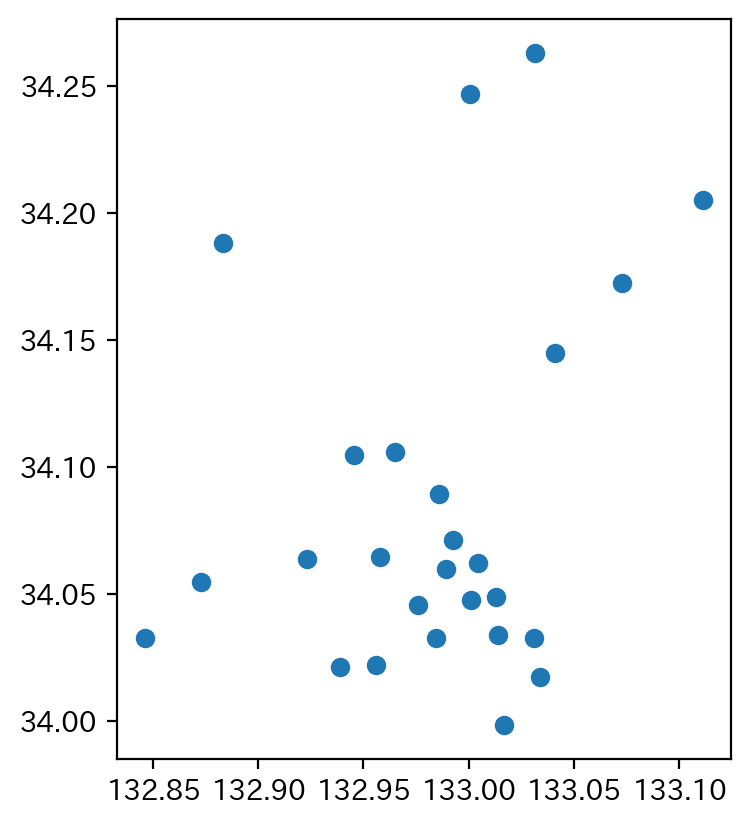

In [21]:
pt_df.plot()

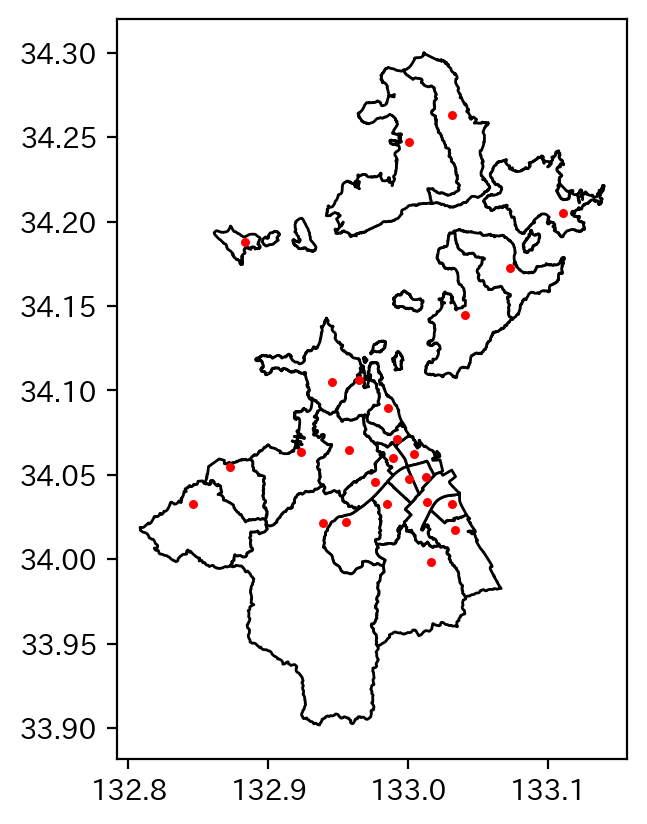

In [22]:
base = imabari.plot(color="white", edgecolor="black")
pt_df.plot(ax=base, marker="o", color="red", markersize=5);

In [23]:
school = pd.merge(imabari, df1, on="学校名")
school

,A27_001,A27_002,A27_003,学校名,住所,geometry,新1年,2年,3年,4年,5年,6年,計
0,38202,今治市立,B138220200263,岡村小学校,今治市関前岡村甲415,"MULTIPOLYGON (((132.87806 34.17759, 132.87807 ...",0,1,0,1,1,1,4
1,38202,今治市立,B138220200156,鴨部小学校,今治市玉川町中村甲574-1,"POLYGON ((132.97970 34.01586, 132.97970 34.015...",13,10,17,12,13,16,81
2,38202,今治市立,B138220200192,亀岡小学校,今治市菊間町種52,"POLYGON ((132.88490 34.05870, 132.88502 34.058...",10,7,7,7,6,8,45
3,38202,今治市立,B138220200209,菊間小学校,今治市菊間町長坂2000-1,"POLYGON ((132.84932 34.04446, 132.84986 34.046...",16,8,15,18,22,16,95
4,38202,今治市立,B138220200218,吉海小学校,今治市吉海町八幡157,"MULTIPOLYGON (((133.01876 34.13892, 133.01844 ...",12,8,7,7,17,11,62
5,38202,今治市立,B138220200227,宮窪小学校,今治市宮窪町宮窪4765,"MULTIPOLYGON (((133.09607 34.17360, 133.09620 ...",10,9,6,13,13,11,62
6,38202,今治市立,B138220200049,近見小学校,今治市近見町1-5-1,"POLYGON ((132.97622 34.11637, 132.97624 34.116...",48,46,36,47,51,58,286
7,38202,今治市立,B138220200165,九和小学校,今治市玉川町摺木甲71-1,"POLYGON ((132.93997 34.03999, 132.94008 34.039...",11,15,13,16,9,21,85
8,38202,今治市立,B138220200138,国分小学校,今治市古国分2-7-1,"POLYGON ((133.02815 34.03755, 133.02840 34.037...",29,32,31,31,38,45,206
9,38202,今治市立,B138220200067,桜井小学校,今治市郷桜井1-8-26,"POLYGON ((133.04610 34.01666, 133.04602 34.016...",48,43,54,57,55,72,329


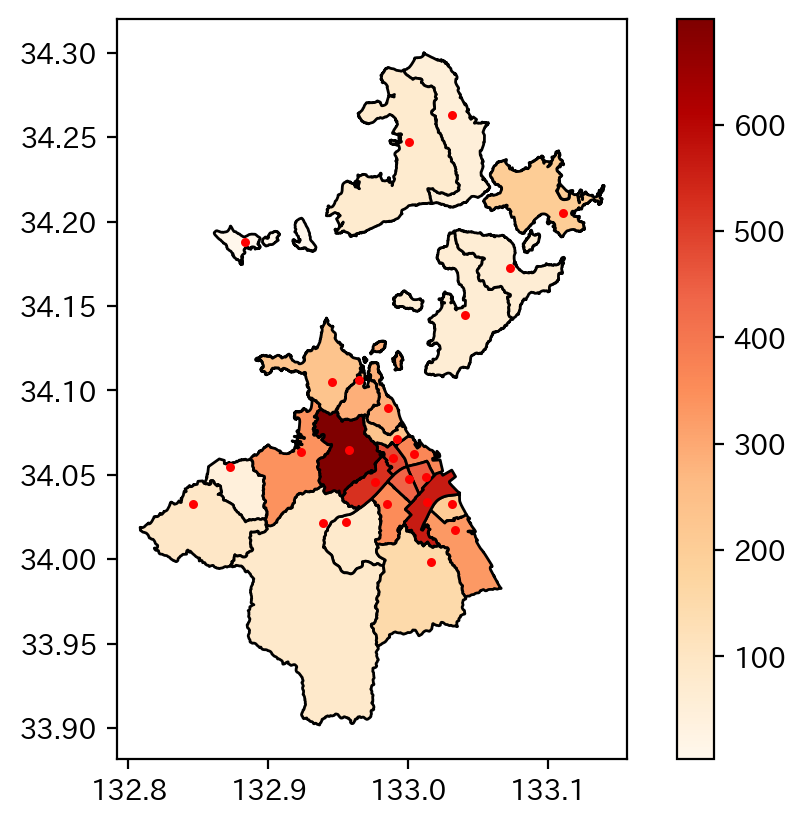

In [24]:
base = school.plot(column="計", cmap="OrRd", edgecolor="black", legend=True)
pt_df.plot(ax=base, marker="o", color="red", markersize=5);

# グラフを保存
plt.savefig('02.png', dpi=200, bbox_inches="tight")
plt.show()

In [25]:
df3

,所在地,電話番号,緯度,経度
施設名,,,,
吹揚小学校,今治市黄金町三丁目3番地,0898220689,34.062174,133.004632
別宮小学校,今治市別宮町五丁目1番地7,0898320688,34.071325,132.992401
常盤小学校,今治市中日吉町二丁目6番55号,0898220477,34.059801,132.989257
近見小学校,今治市近見町一丁目5番1号,0898220258,34.089579,132.986088
立花小学校,今治市立花町四丁目3番45号,0898220185,34.047734,133.001053
鳥生小学校,今治市南高下町三丁目3番71号,0898331221,34.048912,133.013260
桜井小学校,今治市郷桜井一丁目8番26号,0898480217,34.017379,133.034048
国分小学校,今治市古国分二丁目7番1号,0898472050,34.032933,133.031261
富田小学校,今治市上徳甲394番地4,0898486169,34.034117,133.013897


# 小学校の校区の広さ

In [26]:
district = school.set_index("学校名", drop=True)

https://www.gsi.go.jp/sokuchikijun/jpc.html

In [27]:
# 平面直角座標系
district = district.to_crs(epsg=6672)

In [28]:
district["area"] = district.area

In [29]:
# 小学校の校区の広さ順
district.sort_values(by="area", ascending=False)

,A27_001,A27_002,A27_003,住所,geometry,新1年,2年,3年,4年,5年,6年,計,area
学校名,,,,,,,,,,,,,
九和小学校,38202,今治市立,B138220200165,今治市玉川町摺木甲71-1,"POLYGON ((-51709.133 115479.017, -51699.498 11...",11,15,13,16,9,21,85,9.137263e+07
大三島小学校,38202,今治市立,B138220200254,今治市大三島町宮浦5145,"POLYGON ((-49369.473 132426.350, -49374.809 13...",12,12,11,12,12,18,77,4.206445e+07
朝倉小学校,38202,今治市立,B138220200147,今治市朝倉北甲281,"POLYGON ((-45515.566 112110.144, -45512.359 11...",22,27,25,25,30,22,151,3.119869e+07
吉海小学校,38202,今治市立,B138220200218,今治市吉海町八幡157,"MULTIPOLYGON (((-44382.411 126415.326, -44411....",12,8,7,7,17,11,62,2.732427e+07
菊間小学校,38202,今治市立,B138220200209,今治市菊間町長坂2000-1,"POLYGON ((-60075.890 116024.310, -60024.929 11...",16,8,15,18,22,16,95,2.642962e+07
上浦小学校,38202,今治市立,B138220200245,今治市上浦町井口4497-1,"POLYGON ((-45002.096 144250.653, -44998.867 14...",4,9,7,11,11,9,51,2.229050e+07
伯方小学校,38202,今治市立,B138220200236,今治市伯方町木浦甲3599-2,"MULTIPOLYGON (((-34614.204 133116.089, -34610....",38,32,35,26,33,39,203,2.067535e+07
大西小学校,38202,今治市立,B138220200183,今治市大西町大井浜103,"POLYGON ((-52594.098 121608.018, -52595.936 12...",49,65,62,55,48,64,343,1.859686e+07
宮窪小学校,38202,今治市立,B138220200227,今治市宮窪町宮窪4765,"MULTIPOLYGON (((-37237.295 130230.177, -37225....",10,9,6,13,13,11,62,1.667126e+07
